In [1]:
import os
import pandas as pd
os.chdir(r"E:\BaiduNetdiskDownload\用实战玩转Pandas数据分析\用实战玩转Pandas数据分析\05 Python批量处理Excel表格\Python+excel\源数据128张表格")

In [4]:
name = "垂钓装备&绑钩器.xlsx"
df = pd.read_excel(name)
df.head()

,日期,转化率,访客数,三级类目,客单价,品牌
0,2019-08,0.025806,221402,绑钩器,33.284283,品牌-17
1,2019-08,0.019638,14074,绑钩器,233.995330,品牌-12
2,2019-08,0.065407,75392,绑钩器,11.938785,品牌-20
3,2019-08,0.015905,85529,绑钩器,41.059966,品牌-13
4,2019-08,0.039033,23839,绑钩器,44.502008,品牌-1


In [3]:
pip install xlrd

In [5]:
df["日期"].unique()

array(['2019-08', '2019-07', '2019-06', '2019-05', '2019-04', '2019-03',
       '2019-02', '2019-01', '2018-12', '2018-11', '2018-10', '2018-09'],
      dtype=object)

In [6]:
df.head()

,日期,转化率,访客数,三级类目,客单价,品牌
0,2019-08,0.025806,221402,绑钩器,33.284283,品牌-17
1,2019-08,0.019638,14074,绑钩器,233.995330,品牌-12
2,2019-08,0.065407,75392,绑钩器,11.938785,品牌-20
3,2019-08,0.015905,85529,绑钩器,41.059966,品牌-13
4,2019-08,0.039033,23839,绑钩器,44.502008,品牌-1


In [7]:
df["销售额"] = df["访客数"]*df["转化率"]*df["客单价"]
df.head()

,日期,转化率,访客数,三级类目,客单价,品牌,销售额
0,2019-08,0.025806,221402,绑钩器,33.284283,品牌-17,190167.455681
1,2019-08,0.019638,14074,绑钩器,233.995330,品牌-12,64673.807815
2,2019-08,0.065407,75392,绑钩器,11.938785,品牌-20,58871.997672
3,2019-08,0.015905,85529,绑钩器,41.059966,品牌-13,55856.842507
4,2019-08,0.039033,23839,绑钩器,44.502008,品牌-1,41409.600947


In [8]:
df1 = df.groupby("品牌")["销售额"].sum().reset_index()
df1.head()

,品牌,销售额
0,品牌-1,529837.745358
1,品牌-10,217976.661847
2,品牌-11,327093.079507
3,品牌-12,485635.295843
4,品牌-13,438391.195855


In [9]:
df1["行业"]= name.replace(".xlsx","")
df1.head()

,品牌,销售额,行业
0,品牌-1,529837.745358,垂钓装备&绑钩器
1,品牌-10,217976.661847,垂钓装备&绑钩器
2,品牌-11,327093.079507,垂钓装备&绑钩器
3,品牌-12,485635.295843,垂钓装备&绑钩器
4,品牌-13,438391.195855,垂钓装备&绑钩器


In [15]:
import time
start =time.time()
result = pd.DataFrame()
for name in os.listdir():
    df = pd.read_excel(name)
    df["销售额"] = df["访客数"]*df["转化率"]*df["客单价"]
    df1 = df.groupby("品牌")["销售额"].sum().reset_index()
    df1["行业"]= name.replace(".xlsx","")
    result = pd.concat([result,df1])
final = result.groupby("品牌")["销售额"].sum().reset_index().sort_values("销售额",ascending = False)
end = time.time()
print("所花费时间：%.2f"%(end-start))

所花费时间：4.96


In [14]:
len(os.listdir())

128

In [16]:
final.head()

,品牌,销售额
15,品牌-5,1.226224e+09
8,品牌-17,1.195281e+09
2,品牌-11,1.151829e+09
4,品牌-13,1.150687e+09
3,品牌-12,1.143520e+09


In [17]:
final.shape

(20, 2)

In [20]:
####不显示科学计数法，保留小数点两位数
pd.set_option("display.float_format",lambda x : "%.2f"% x)
print(final.head())
final.describe()

       品牌           销售额
15   品牌-5 1226223640.73
8   品牌-17 1195280571.60
2   品牌-11 1151829215.73
4   品牌-13 1150687029.66
3   品牌-12 1143519788.23


,销售额
count,20.00
mean,1084854125.76
std,63774592.90
min,979272391.61
25%,1050719265.66
50%,1071804742.94
75%,1118990465.22
max,1226223640.73


In [ ]:
####TGI(target group index)指数：可以反映目标群体在特定研究范围内强势或者弱势
####TGI=目标群体中具有某一特征的群体所占比例/总体中具有相同特征的群体所占比例*100

In [21]:
df2 = pd.read_excel(r"E:\BaiduNetdiskDownload\用实战玩转Pandas数据分析\用实战玩转Pandas数据分析\06 TGI指数分析实战\TGI\TGI指数案例数据.xlsx")
df2.head()

,品牌名称,买家昵称,付款日期,订单状态,实付金额,邮费,省份,城市,购买数量
0,viva la vida,做快淘饭,2019-04-18 00:03:00,交易成功,22.32,0,北京,北京市,1
1,viva la vida,作自有世祟,2019-02-17 00:03:51,交易成功,87.00,0,上海,上海市,1
2,viva la vida,作雪白室,2019-04-18 00:01:43,交易成功,97.66,0,福建省,福州市,2
3,viva la vida,作美女购物主,2019-01-11 23:35:01,交易成功,37.23,0,河南省,安阳市,3
4,viva la vida,作美女购物主,2019-02-18 14:16:03,交易成功,29.50,0,河南省,安阳市,2


In [23]:
df2.shape

(28832, 9)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28832 entries, 0 to 28831
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   品牌名称    28832 non-null  object        
 1   买家昵称    28832 non-null  object        
 2   付款日期    28832 non-null  datetime64[ns]
 3   订单状态    28832 non-null  object        
 4   实付金额    28832 non-null  float64       
 5   邮费      28832 non-null  int64         
 6   省份      28832 non-null  object        
 7   城市      28832 non-null  object        
 8   购买数量    28832 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 2.0+ MB


In [25]:
gp_user = df2.groupby("买家昵称")["实付金额"].mean().reset_index()
gp_user.head()

,买家昵称,实付金额
0,.blue_ram,49.45
1,.christiny,22.00
2,.willn1,34.57
3,.托托m,37.48
4,0000妮,13.50


In [26]:
gp_user.shape

(25948, 2)

In [27]:
def if_hight(x):
    if x>50:
        return "高单价"
    else:
        return "低单价"
    
gp_user["客单类别"] = gp_user["实付金额"].apply(if_hight)
gp_user.head(10)

,买家昵称,实付金额,客单类别
0,.blue_ram,49.45,低单价
1,.christiny,22.00,低单价
2,.willn1,34.57,低单价
3,.托托m,37.48,低单价
4,0000妮,13.50,低单价
5,0009797王,94.50,高单价
6,000xyx0,99.25,高单价
7,000米粒儿米粒0,24.50,低单价
8,00556旭79618,23.86,低单价
9,00不哭0,53.55,高单价


In [28]:
gp_user.shape

(25948, 3)

In [29]:
df_dup = df2.loc[df2.duplicated("买家昵称") ==False,:]
df_dup.shape

(25948, 9)

In [31]:
df_merge = pd.merge(gp_user,df_dup,left_on ="买家昵称",right_on="买家昵称",how = "left")
df_merge.head()

,买家昵称,实付金额_x,客单类别,品牌名称,付款日期,订单状态,实付金额_y,邮费,省份,城市,购买数量
0,.blue_ram,49.45,低单价,viva la vida,2019-02-04 17:49:34.000,交易成功,49.45,0,上海,上海市,1
1,.christiny,22.00,低单价,viva la vida,2019-01-29 14:17:15.000,交易成功,22.00,0,江苏省,南京市,1
2,.willn1,34.57,低单价,viva la vida,2019-01-11 03:46:18.000,交易成功,34.57,0,山东省,烟台市,2
3,.托托m,37.48,低单价,viva la vida,2019-01-11 02:26:33.000,交易成功,37.48,0,上海,上海市,3
4,0000妮,13.50,低单价,viva la vida,2019-06-28 16:53:26.458,交易成功,13.50,0,广东省,揭阳市,1


In [32]:
df_merge.shape

(25948, 11)

In [33]:
df_merge = df_merge[["买家昵称","客单类别","省份","城市"]]
result = pd.pivot_table(df_merge,index = ["省份","城市"],columns = ["客单类别"],aggfunc = "count")
result.head()

买家昵称        
客单类别            低单价     高单价
省份  城市                     
上海  上海市     2818.00 2374.00
云南省 临沧市        3.00    2.00
    丽江市        1.00    3.00
    保山市        6.00    2.00
    大理白族自治州    9.00    8.00

In [35]:
result["买家昵称"].head()

客单类别            低单价     高单价
省份  城市                     
上海  上海市     2818.00 2374.00
云南省 临沧市        3.00    2.00
    丽江市        1.00    3.00
    保山市        6.00    2.00
    大理白族自治州    9.00    8.00

In [38]:
a = result["买家昵称"]["高单价"].reset_index()

In [39]:
b = result["买家昵称"]["低单价"].reset_index()

In [41]:
v = result["买家昵称"][["高单价","低单价"]].reset_index()
v.head()

客单类别,省份,城市,高单价,低单价
0,上海,上海市,2374.00,2818.00
1,云南省,临沧市,2.00,3.00
2,云南省,丽江市,3.00,1.00
3,云南省,保山市,2.00,6.00
4,云南省,大理白族自治州,8.00,9.00


In [42]:
v["总人数"] = v["高单价"] + v["低单价"]
v["高单价占比"] = v["高单价"]/v["总人数"]
v.head()

客单类别,省份,城市,高单价,低单价,总人数,高单价占比
0,上海,上海市,2374.00,2818.00,5192.00,0.46
1,云南省,临沧市,2.00,3.00,5.00,0.40
2,云南省,丽江市,3.00,1.00,4.00,0.75
3,云南省,保山市,2.00,6.00,8.00,0.25
4,云南省,大理白族自治州,8.00,9.00,17.00,0.47


In [43]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   省份      346 non-null    object 
 1   城市      346 non-null    object 
 2   高单价     332 non-null    float64
 3   低单价     329 non-null    float64
 4   总人数     315 non-null    float64
 5   高单价占比   315 non-null    float64
dtypes: float64(4), object(2)
memory usage: 16.3+ KB


In [44]:
v =v.dropna()
v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 345
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   省份      315 non-null    object 
 1   城市      315 non-null    object 
 2   高单价     315 non-null    float64
 3   低单价     315 non-null    float64
 4   总人数     315 non-null    float64
 5   高单价占比   315 non-null    float64
dtypes: float64(4), object(2)
memory usage: 17.2+ KB


In [45]:
v["total_pencentage"] = v["高单价"].sum()/v["总人数"].sum()
v.head()

客单类别,省份,城市,高单价,低单价,总人数,高单价占比,total_pencentage
0,上海,上海市,2374.00,2818.00,5192.00,0.46,0.42
1,云南省,临沧市,2.00,3.00,5.00,0.40,0.42
2,云南省,丽江市,3.00,1.00,4.00,0.75,0.42
3,云南省,保山市,2.00,6.00,8.00,0.25,0.42
4,云南省,大理白族自治州,8.00,9.00,17.00,0.47,0.42


In [46]:
v["高单价TGI指数"]= v["高单价占比"]/v["total_pencentage"]*100
v = v.sort_values("高单价TGI指数",ascending = False)
v.head(10)

客单类别,省份,城市,高单价,低单价,总人数,高单价占比,total_pencentage,高单价TGI指数
149,新疆维吾尔自治区,哈密市,4.00,1.00,5.00,0.80,0.42,192.64
152,新疆维吾尔自治区,巴音郭楞蒙古自治州,10.00,3.00,13.00,0.77,0.42,185.23
2,云南省,丽江市,3.00,1.00,4.00,0.75,0.42,180.60
277,甘肃省,白银市,3.00,1.00,4.00,0.75,0.42,180.60
34,吉林省,辽源市,2.00,1.00,3.00,0.67,0.42,160.53
44,四川省,广安市,6.00,3.00,9.00,0.67,0.42,160.53
136,广西壮族自治区,河池市,4.00,2.00,6.00,0.67,0.42,160.53
25,内蒙古自治区,锡林郭勒盟,2.00,1.00,3.00,0.67,0.42,160.53
343,黑龙江省,鹤岗市,2.00,1.00,3.00,0.67,0.42,160.53
97,山西省,临汾市,9.00,5.00,14.00,0.64,0.42,154.80


In [48]:
v.loc[v["总人数"]>v["总人数"].mean(),:].head(10)

客单类别,省份,城市,高单价,低单价,总人数,高单价占比,total_pencentage,高单价TGI指数
287,福建省,福州市,145.00,135.00,280.00,0.52,0.42,124.70
124,广东省,珠海市,49.00,52.00,101.00,0.49,0.42,116.82
27,北京,北京市,1203.00,1298.00,2501.00,0.48,0.42,115.83
283,福建省,厦门市,105.00,118.00,223.00,0.47,0.42,113.38
111,广东省,佛山市,118.00,135.00,253.00,0.47,0.42,112.31
173,江西省,南昌市,63.00,73.00,136.00,0.46,0.42,111.55
46,四川省,成都市,287.00,334.00,621.00,0.46,0.42,111.29
0,上海,上海市,2374.00,2818.00,5192.00,0.46,0.42,110.10
164,江苏省,无锡市,135.00,162.00,297.00,0.45,0.42,109.45
120,广东省,深圳市,438.00,528.00,966.00,0.45,0.42,109.18


In [2]:
import pandas as pd
df5 = pd.read_excel(r"E:\BaiduNetdiskDownload\用实战玩转Pandas数据分析\用实战玩转Pandas数据分析\07 RFM建模实战\RFM\PYTHON-RFM实战数据.xlsx")
df5.head()

,品牌名称,买家昵称,付款日期,订单状态,实付金额,邮费,省份,城市,购买数量
0,数据不吹牛,叫我李2,2019-01-01 00:17:59,交易成功,186,6,上海,上海市,1
1,数据不吹牛,0cyb1992,2019-01-01 00:59:54,交易成功,145,0,广东省,广州市,1
2,数据不吹牛,萝污萌莉,2019-01-01 07:48:48,交易成功,194,8,山东省,东营市,1
3,数据不吹牛,atblovemyy,2019-01-01 09:15:49,付款以后用户退款成功，交易自动关闭,84,0,江苏省,镇江市,1
4,数据不吹牛,小星期鱼,2019-01-01 09:59:33,付款以后用户退款成功，交易自动关闭,74,0,上海,上海市,1


In [3]:
df5.shape

(28833, 9)

In [5]:
df5["订单状态"].unique()

array(['交易成功', '付款以后用户退款成功，交易自动关闭'], dtype=object)

In [6]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28833 entries, 0 to 28832
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   品牌名称    28833 non-null  object        
 1   买家昵称    28833 non-null  object        
 2   付款日期    28833 non-null  datetime64[ns]
 3   订单状态    28833 non-null  object        
 4   实付金额    28833 non-null  int64         
 5   邮费      28833 non-null  int64         
 6   省份      28833 non-null  object        
 7   城市      28832 non-null  object        
 8   购买数量    28833 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 2.0+ MB


In [8]:
df6 = df5.loc[df5["订单状态"] == "交易成功",:]
df6.head()

,品牌名称,买家昵称,付款日期,订单状态,实付金额,邮费,省份,城市,购买数量
0,数据不吹牛,叫我李2,2019-01-01 00:17:59,交易成功,186,6,上海,上海市,1
1,数据不吹牛,0cyb1992,2019-01-01 00:59:54,交易成功,145,0,广东省,广州市,1
2,数据不吹牛,萝污萌莉,2019-01-01 07:48:48,交易成功,194,8,山东省,东营市,1
5,数据不吹牛,重碎叠,2019-01-01 10:00:07,交易成功,197,0,江苏省,南京市,1
6,数据不吹牛,iho_jann,2019-01-01 10:00:08,交易成功,168,0,广东省,广州市,1


In [9]:
df6.shape

(27793, 9)

In [10]:
df7 = df6[["买家昵称","付款日期","实付金额"]]
df7.head()

,买家昵称,付款日期,实付金额
0,叫我李2,2019-01-01 00:17:59,186
1,0cyb1992,2019-01-01 00:59:54,145
2,萝污萌莉,2019-01-01 07:48:48,194
5,重碎叠,2019-01-01 10:00:07,197
6,iho_jann,2019-01-01 10:00:08,168


In [26]:
r = df7.groupby("买家昵称")["付款日期"].max().reset_index()
r.head()

,买家昵称,付款日期
0,.blue_ram,2019-02-04 17:49:34.000
1,.christiny,2019-01-29 14:17:15.000
2,.willn1,2019-01-11 03:46:18.000
3,.托托m,2019-01-11 02:26:33.000
4,0000妮,2019-06-28 16:53:26.458


In [27]:
r["R"] = (pd.to_datetime("2019-7-1")- r.iloc[:,1]).dt.days
r = r[["买家昵称","R"]]
r.head()

,买家昵称,R
0,.blue_ram,146
1,.christiny,152
2,.willn1,170
3,.托托m,170
4,0000妮,2


In [24]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25420 entries, 0 to 25419
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   买家昵称    25420 non-null  object
 1   R       25420 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 397.3+ KB


In [29]:
df7["日期标签"] = df7["付款日期"].astype(str).str[:10]
dup_f = df7.groupby(["买家昵称","日期标签"])["付款日期"].count().reset_index()
dup_f.head()

E:\environment\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,买家昵称,日期标签,付款日期
0,.blue_ram,2019-02-04,1
1,.christiny,2019-01-29,1
2,.willn1,2019-01-11,1
3,.托托m,2019-01-11,1
4,0000妮,2019-06-28,1


In [30]:
f = dup_f[["买家昵称","付款日期"]]
f.columns = ["买家昵称","F"]
f.head()

,买家昵称,F
0,.blue_ram,1
1,.christiny,1
2,.willn1,1
3,.托托m,1
4,0000妮,1


In [31]:
sum_m = df7.groupby("买家昵称")["实付金额"].sum().reset_index()
sum_m.columns = ["买家昵称","总支付金额"]
com_m = pd.merge(sum_m,f,left_on = "买家昵称",right_on="买家昵称",how ="inner")
com_m["M"] =com_m["总支付金额"]/com_m["F"]
com_m.head()

,买家昵称,总支付金额,F,M
0,.blue_ram,49,1,49.0
1,.christiny,183,1,183.0
2,.willn1,34,1,34.0
3,.托托m,37,1,37.0
4,0000妮,164,1,164.0


In [32]:
rfm = pd.merge(r,com_m,left_on = "买家昵称",right_on="买家昵称",how="inner")
rfm =rfm[["买家昵称","R","F","M"]]
rfm.head()

,买家昵称,R,F,M
0,.blue_ram,146,1,49.0
1,.christiny,152,1,183.0
2,.willn1,170,1,34.0
3,.托托m,170,1,37.0
4,0000妮,2,1,164.0


In [33]:
rfm["R区间"]= pd.cut(rfm["R"],bins=[0,30,60,90,120,1000000])
rfm.head()

,买家昵称,R,F,M,R区间
0,.blue_ram,146,1,49.0,"(120, 1000000]"
1,.christiny,152,1,183.0,"(120, 1000000]"
2,.willn1,170,1,34.0,"(120, 1000000]"
3,.托托m,170,1,37.0,"(120, 1000000]"
4,0000妮,2,1,164.0,"(0, 30]"


In [34]:
rfm["R_score"]= pd.cut(rfm["R"],bins=[0,30,60,90,120,1000000],labels=[5,4,3,2,1],right=False).astype(float)
rfm.head()

,买家昵称,R,F,M,R区间,R_score
0,.blue_ram,146,1,49.0,"(120, 1000000]",1.0
1,.christiny,152,1,183.0,"(120, 1000000]",1.0
2,.willn1,170,1,34.0,"(120, 1000000]",1.0
3,.托托m,170,1,37.0,"(120, 1000000]",1.0
4,0000妮,2,1,164.0,"(0, 30]",5.0


In [36]:
rfm["F_score"]=pd.cut(rfm["F"],bins=[1,2,3,4,5,10000],labels=[1,2,3,4,5],right=False).astype(float)
rfm["M_score"]=pd.cut(rfm["M"],bins=[0,50,100,150,200,100000],labels=[1,2,3,4,5],right=False).astype(float)

In [37]:
rfm

,买家昵称,R,F,M,R区间,R_score,F_score,M_score
0,.blue_ram,146,1,49.0,"(120, 1000000]",1.0,1.0,1.0
1,.christiny,152,1,183.0,"(120, 1000000]",1.0,1.0,4.0
2,.willn1,170,1,34.0,"(120, 1000000]",1.0,1.0,1.0
3,.托托m,170,1,37.0,"(120, 1000000]",1.0,1.0,1.0
4,0000妮,2,1,164.0,"(0, 30]",5.0,1.0,4.0
...,...,...,...,...,...,...,...,...
27387,龙魔鬼女,72,1,87.0,"(60, 90]",3.0,1.0,2.0
27388,龟mil宝,11,1,497.0,"(0, 30]",5.0,1.0,5.0
27389,龟mil宝,11,1,497.0,"(0, 30]",5.0,1.0,5.0
27390,！谢鹏逗逼？,24,1,137.0,"(0, 30]",5.0,1.0,3.0


In [38]:
rfm["R是否大于平均值"] = (rfm["R_score"]>rfm["R_score"].mean())*1
rfm["F是否大于平均值"] = (rfm["F_score"]>rfm["F_score"].mean())*1
rfm["M是否大于平均值"] = (rfm["M_score"]>rfm["M_score"].mean())*1
rfm.head(10)

,买家昵称,R,F,M,R区间,R_score,F_score,M_score,R是否大于平均值,F是否大于平均值,M是否大于平均值
0,.blue_ram,146,1,49.0,"(120, 1000000]",1.0,1.0,1.0,0,0,0
1,.christiny,152,1,183.0,"(120, 1000000]",1.0,1.0,4.0,0,0,1
2,.willn1,170,1,34.0,"(120, 1000000]",1.0,1.0,1.0,0,0,0
3,.托托m,170,1,37.0,"(120, 1000000]",1.0,1.0,1.0,0,0,0
4,0000妮,2,1,164.0,"(0, 30]",5.0,1.0,4.0,1,0,1
5,0009797王,127,1,94.0,"(120, 1000000]",1.0,1.0,2.0,0,0,0
6,000xyx0,73,1,99.0,"(60, 90]",3.0,1.0,2.0,1,0,0
7,000米粒儿米粒0,148,1,170.0,"(120, 1000000]",1.0,1.0,4.0,0,0,1
8,00556旭79618,157,1,159.0,"(120, 1000000]",1.0,1.0,4.0,0,0,1
9,00不哭0,159,1,53.0,"(120, 1000000]",1.0,1.0,2.0,0,0,0


In [40]:
rfm["人群分值"]=(rfm["R是否大于平均值"]*100)+(rfm["F是否大于平均值"]*10)+(rfm["M是否大于平均值"]*1)
rfm.head(10)

,买家昵称,R,F,M,R区间,R_score,F_score,M_score,R是否大于平均值,F是否大于平均值,M是否大于平均值,人群分值
0,.blue_ram,146,1,49.0,"(120, 1000000]",1.0,1.0,1.0,0,0,0,0
1,.christiny,152,1,183.0,"(120, 1000000]",1.0,1.0,4.0,0,0,1,1
2,.willn1,170,1,34.0,"(120, 1000000]",1.0,1.0,1.0,0,0,0,0
3,.托托m,170,1,37.0,"(120, 1000000]",1.0,1.0,1.0,0,0,0,0
4,0000妮,2,1,164.0,"(0, 30]",5.0,1.0,4.0,1,0,1,101
5,0009797王,127,1,94.0,"(120, 1000000]",1.0,1.0,2.0,0,0,0,0
6,000xyx0,73,1,99.0,"(60, 90]",3.0,1.0,2.0,1,0,0,100
7,000米粒儿米粒0,148,1,170.0,"(120, 1000000]",1.0,1.0,4.0,0,0,1,1
8,00556旭79618,157,1,159.0,"(120, 1000000]",1.0,1.0,4.0,0,0,1,1
9,00不哭0,159,1,53.0,"(120, 1000000]",1.0,1.0,2.0,0,0,0,0


In [41]:
def transform_label(x):
    if x == 111:
        label = "重要价值客户"
    elif x == 110:
        label = "消费潜力客户"
    elif x == 101:
        label = "频次深耕客户"
    elif x == 100:
        label = "新客户"
    elif x==11:
        label = "重要价值流失预警客户"
    elif x==10:
        label = "一般客户"
    elif x==1:
        label = "高消费唤回客户"
    elif x==0:
        label = "流失客户"
    return label

In [42]:
rfm["人群类型"] = rfm["人群分值"].apply(transform_label)
rfm.head(10)

,买家昵称,R,F,M,R区间,R_score,F_score,M_score,R是否大于平均值,F是否大于平均值,M是否大于平均值,人群分值,人群类型
0,.blue_ram,146,1,49.0,"(120, 1000000]",1.0,1.0,1.0,0,0,0,0,流失客户
1,.christiny,152,1,183.0,"(120, 1000000]",1.0,1.0,4.0,0,0,1,1,高消费唤回客户
2,.willn1,170,1,34.0,"(120, 1000000]",1.0,1.0,1.0,0,0,0,0,流失客户
3,.托托m,170,1,37.0,"(120, 1000000]",1.0,1.0,1.0,0,0,0,0,流失客户
4,0000妮,2,1,164.0,"(0, 30]",5.0,1.0,4.0,1,0,1,101,频次深耕客户
5,0009797王,127,1,94.0,"(120, 1000000]",1.0,1.0,2.0,0,0,0,0,流失客户
6,000xyx0,73,1,99.0,"(60, 90]",3.0,1.0,2.0,1,0,0,100,新客户
7,000米粒儿米粒0,148,1,170.0,"(120, 1000000]",1.0,1.0,4.0,0,0,1,1,高消费唤回客户
8,00556旭79618,157,1,159.0,"(120, 1000000]",1.0,1.0,4.0,0,0,1,1,高消费唤回客户
9,00不哭0,159,1,53.0,"(120, 1000000]",1.0,1.0,2.0,0,0,0,0,流失客户


In [43]:
count = rfm["人群类型"].value_counts().reset_index()
count.columns = ["客户类型","人数"]
count["人数占比"] = count["人数"]/count["人数"].sum()
count.head(10)

,客户类型,人数,人数占比
0,流失客户,9491,0.346488
1,新客户,6789,0.247846
2,高消费唤回客户,5409,0.197466
3,频次深耕客户,5325,0.194400
4,一般客户,148,0.005403
5,重要价值流失预警客户,91,0.003322
6,重要价值客户,75,0.002738
7,消费潜力客户,64,0.002336


In [44]:
rfm["购买总金额"]=rfm["F"]*rfm["M"]
mon = rfm.groupby("人群类型")["购买总金额"].sum().reset_index()
mon.columns = ["客户类型","消费金额"]
mon["金额占比"]=mon["消费金额"]/mon["消费金额"].sum()
mon.head(10)

,客户类型,消费金额,金额占比
0,一般客户,30533.0,0.007457
1,新客户,594122.0,0.145093
2,流失客户,808381.0,0.197418
3,消费潜力客户,13610.0,0.003324
4,重要价值客户,49873.0,0.012180
5,重要价值流失预警客户,35916.0,0.008771
6,频次深耕客户,1356991.0,0.331396
7,高消费唤回客户,1205345.0,0.294362


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [55]:
mon1 = mon.sort_values(by = "消费金额" ,ascending =False)
mon1

,客户类型,消费金额,金额占比
6,频次深耕客户,1356991.0,0.331396
7,高消费唤回客户,1205345.0,0.294362
2,流失客户,808381.0,0.197418
1,新客户,594122.0,0.145093
4,重要价值客户,49873.0,0.012180
5,重要价值流失预警客户,35916.0,0.008771
0,一般客户,30533.0,0.007457
3,消费潜力客户,13610.0,0.003324


In [93]:
plt.rcParams["font.sans-serif"]=["SimHei"]

In [95]:
sns.barplot(x = mon1.iloc[:,0],y = mon1.iloc[:,1],hue = mon1.iloc[:,0])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='客户类型', ylabel='消费金额'>

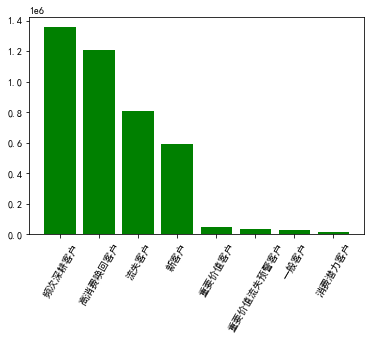

In [81]:
plt.bar(mon1.iloc[:,0],mon1.iloc[:,1],align='center',color= "green")
plt.xticks(rotation = 60)
plt.show()

In [83]:
count1 = count.sort_values(by = "人数" ,ascending =False)
count1

,客户类型,人数,人数占比
0,流失客户,9491,0.346488
1,新客户,6789,0.247846
2,高消费唤回客户,5409,0.197466
3,频次深耕客户,5325,0.194400
4,一般客户,148,0.005403
5,重要价值流失预警客户,91,0.003322
6,重要价值客户,75,0.002738
7,消费潜力客户,64,0.002336


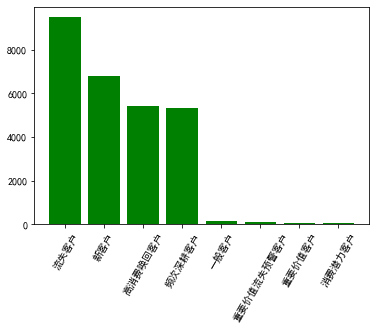

In [84]:
plt.bar(count1.iloc[:,0],count.iloc[:,1],align='center',color= "green")
plt.xticks(rotation = 60)
plt.show()

In [96]:
####同期群分析实战

In [97]:
df10 = pd.read_excel(r"E:\BaiduNetdiskDownload\用实战玩转Pandas数据分析\用实战玩转Pandas数据分析\08 同期群分析实战\同期群订单数据.xlsx")
df10.head()

,平台,店铺名称,客户昵称,付款时间,订单状态,支付金额,购买数量,省份
0,线上,小z杂货铺,入倩出入深,2019-09-01 00:10:04,交易成功,15.2,1,江苏省
1,线上,小z杂货铺,愛hya爱,2019-09-01 00:14:52,交易成功,8.4,1,广东省
2,线上,小z杂货铺,象95象大,2019-09-01 02:17:15,交易成功,8.4,1,辽宁省
3,线上,小z杂货铺,卡哇伊氛十,2019-09-01 03:37:28,交易成功,22.0,1,广西壮族自治区
4,线上,小z杂货铺,一只羊哈阿,2019-09-01 08:53:50,交易成功,85.0,1,辽宁省


In [98]:
df10.shape

(42713, 8)

In [99]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42713 entries, 0 to 42712
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   平台      42713 non-null  object        
 1   店铺名称    42713 non-null  object        
 2   客户昵称    42713 non-null  object        
 3   付款时间    40339 non-null  datetime64[ns]
 4   订单状态    42713 non-null  object        
 5   支付金额    42713 non-null  float64       
 6   购买数量    42713 non-null  int64         
 7   省份      42713 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 2.6+ MB


In [108]:
df10.loc[df10["付款时间"].isnull(),:].head()

,平台,店铺名称,客户昵称,付款时间,订单状态,支付金额,购买数量,省份
40339,线上,小z杂货铺,爱购物nx,NaT,交易失败,97.8,1,浙江省
40340,线上,小z杂货铺,975ay,NaT,交易失败,117.3,2,浙江省
40341,线上,小z杂货铺,101呆阿,NaT,交易失败,144.5,2,新疆维吾尔自治区
40342,线上,小z杂货铺,489bt,NaT,交易失败,92.7,1,江苏省
40343,线上,小z杂货铺,姚琳儿姚姚,NaT,交易失败,8.4,1,广东省


In [110]:
x = df10["付款时间"].isnull().to_list()
x

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [116]:
df10.iloc[x].head()

,平台,店铺名称,客户昵称,付款时间,订单状态,支付金额,购买数量,省份
40339,线上,小z杂货铺,爱购物nx,NaT,交易失败,97.8,1,浙江省
40340,线上,小z杂货铺,975ay,NaT,交易失败,117.3,2,浙江省
40341,线上,小z杂货铺,101呆阿,NaT,交易失败,144.5,2,新疆维吾尔自治区
40342,线上,小z杂货铺,489bt,NaT,交易失败,92.7,1,江苏省
40343,线上,小z杂货铺,姚琳儿姚姚,NaT,交易失败,8.4,1,广东省


In [118]:
df10.loc[df10["付款时间"].isnull(),:]["订单状态"].value_counts()

交易失败    2374
Name: 订单状态, dtype: int64

In [119]:
df10.loc[df10["付款时间"].isnull() ==False,:]["订单状态"].value_counts()

交易成功    40339
Name: 订单状态, dtype: int64

In [121]:
order = df10.loc[df10["付款时间"].isnull()==False,:]
order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40339 entries, 0 to 40338
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   平台      40339 non-null  object        
 1   店铺名称    40339 non-null  object        
 2   客户昵称    40339 non-null  object        
 3   付款时间    40339 non-null  datetime64[ns]
 4   订单状态    40339 non-null  object        
 5   支付金额    40339 non-null  float64       
 6   购买数量    40339 non-null  int64         
 7   省份      40339 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 2.8+ MB


In [123]:
order["时间标签"]=order["付款时间"].astype(str).str[:7]
order["时间标签"].value_counts().sort_index()

E:\environment\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2019-09    2201
2019-10    8096
2019-11    6050
2019-12    6760
2020-01    7443
2020-02    9789
Name: 时间标签, dtype: int64

In [124]:
order.head()

,平台,店铺名称,客户昵称,付款时间,订单状态,支付金额,购买数量,省份,时间标签
0,线上,小z杂货铺,入倩出入深,2019-09-01 00:10:04,交易成功,15.2,1,江苏省,2019-09
1,线上,小z杂货铺,愛hya爱,2019-09-01 00:14:52,交易成功,8.4,1,广东省,2019-09
2,线上,小z杂货铺,象95象大,2019-09-01 02:17:15,交易成功,8.4,1,辽宁省,2019-09
3,线上,小z杂货铺,卡哇伊氛十,2019-09-01 03:37:28,交易成功,22.0,1,广西壮族自治区,2019-09
4,线上,小z杂货铺,一只羊哈阿,2019-09-01 08:53:50,交易成功,85.0,1,辽宁省,2019-09


In [125]:
order.shape

(40339, 9)

In [127]:
len(order["客户昵称"].unique())

31094

In [129]:
month = "2019-10"
sample = order.loc[order["时间标签"]==month,:]
print("10月订单数量：",len(sample))
sample_c = sample.groupby("客户昵称")["支付金额"].sum().reset_index()
print("10月客户数量：",len(sample_c))


10月订单数量： 8096
10月客户数量： 7336


In [130]:
history = order.loc[order["时间标签"]=="2019-09",:]
history.head()

,平台,店铺名称,客户昵称,付款时间,订单状态,支付金额,购买数量,省份,时间标签
0,线上,小z杂货铺,入倩出入深,2019-09-01 00:10:04,交易成功,15.2,1,江苏省,2019-09
1,线上,小z杂货铺,愛hya爱,2019-09-01 00:14:52,交易成功,8.4,1,广东省,2019-09
2,线上,小z杂货铺,象95象大,2019-09-01 02:17:15,交易成功,8.4,1,辽宁省,2019-09
3,线上,小z杂货铺,卡哇伊氛十,2019-09-01 03:37:28,交易成功,22.0,1,广西壮族自治区,2019-09
4,线上,小z杂货铺,一只羊哈阿,2019-09-01 08:53:50,交易成功,85.0,1,辽宁省,2019-09


In [131]:
sample_c = sample_c.loc[sample_c["客户昵称"].isin(history["客户昵称"]) == False,:]
print("2019年10月新增客户：",len(sample_c))
sample_c.head(10)

2019年10月新增客户： 7083


,客户昵称,支付金额
0,0000栗,4.2
1,000ab,16.8
2,000al,16.8
3,000bb,16.8
4,000il,16.8
5,000lw,80.8
6,000mm,4.2
7,000xc,8.4
8,000之淘,80.8
9,000嘟嘟,4.2


In [133]:
re = []
for i in ["2019-11","2019-12","2020-01","2020-02"]:
    next_month = order.loc[order["时间标签"]==i,:]
    target_users = sample_c.loc[sample_c["客户昵称"].isin(next_month["客户昵称"])==True,:]
    re.append([i+"留存情况：",len(target_users)])
re

[['2019-11留存情况：', 539],
 ['2019-12留存情况：', 428],
 ['2020-01留存情况：', 414],
 ['2020-02留存情况：', 426]]

In [136]:
re.insert(0,["2019-10新增客户：",len(sample_c)])
re

[['2019-10新增客户：', 7083],
 ['2019-11留存情况：', 539],
 ['2019-12留存情况：', 428],
 ['2020-01留存情况：', 414],
 ['2020-02留存情况：', 426]]

In [139]:
month_list = order["时间标签"].unique()
month_list

array(['2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02'],
      dtype=object)

In [144]:
month_list = order["时间标签"].unique()
final = pd.DataFrame()
for i in range(len(month_list)-1):
    count = [0]*len(month_list)
    target_month = order.loc[order["时间标签"]==month_list[i],:]
    target_users = target_month.groupby("客户昵称")["支付金额"].sum().reset_index()
    if i ==0:
        new_target_users = target_users
    else:
        history = order.loc[order["时间标签"].isin(month_list[:i]),:]
        new_target_users = target_users.loc[target_users["客户昵称"].isin(history["客户昵称"])==False,:]
    count[0] = len(new_target_users)
    for j ,k in zip(range(i+1,len(month_list)),range(1,len(month_list))):
        next_month = order.loc[order["时间标签"]==month_list[j],:]
        next_users = next_month.groupby("客户昵称")["支付金额"].sum().reset_index()
        isin = new_target_users["客户昵称"].isin(next_users["客户昵称"]).sum()
        count[k] = isin
    result = pd.DataFrame({month_list[i]:count}).T
    final = pd.concat([final,result])
final.columns = ["当月新增","+1月","+2月","+3月","+4月","+5月"]

In [145]:
final

,当月新增,+1月,+2月,+3月,+4月,+5月
2019-09,2042,253,219,167,159,165
2019-10,7083,539,428,414,426,0
2019-11,4744,448,370,294,0,0
2019-12,4983,491,340,0,0,0
2020-01,5126,484,0,0,0,0


In [128]:
len(order)

40339

In [ ]:
sns.barplot(x = mon.iloc[:,0],y = mon.iloc[:,1])